In [1]:
# Will Hollingsworth, Colton Murray, Alexander Shiveley

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Getting our data into Python

We're going to start off with reading our given `insurance.csv` file; which is a little tricky considering it has a bunch of non-numeric information like the sex and region.
So we're also going to be stripping out the region column and headers, and converting the data into numbers that we can work with. The remaining columns of non-numeric information will be mapped to 0 or 1.

In [3]:
# Load the csv as a numpy array of strings, 
# because we need to strip out the region column, then convert sex and smoker to numbers
raw_data = np.loadtxt('insurance.csv', delimiter=',', dtype=str)

# Just putting "raw_data" here prints out said variable as it would in a normal console
raw_data

array([['age', 'sex', 'bmi', ..., 'smoker', 'region', 'charges'],
       ['19', 'female', '27.9', ..., 'yes', 'southwest', '16884.924'],
       ['18', 'male', '33.77', ..., 'no', 'southeast', '1725.5523'],
       ...,
       ['18', 'female', '36.85', ..., 'no', 'southeast', '1629.8335'],
       ['21', 'female', '25.8', ..., 'no', 'southwest', '2007.945'],
       ['61', 'female', '29.07', ..., 'yes', 'northwest', '29141.3603']],
      dtype='<U11')

In [4]:
# First lets delete the region column we don't need
# (see numpy's delete documentation)
stripped = np.delete(raw_data, [5], axis=1)

# We also need to remove the first row which is just the names of each column
stripped = np.delete(stripped, [0], axis=0)

In [5]:
# Now the columns for sex and smoker need to be mapped to 0 and 1
# The values in the lists for mapping map between the value at index i to the value i
sex_mapping = ['male', 'female']
smoker_mapping = ['no', 'yes']

# First define a function to apply the above mappings to a row
def apply_mapping(row):
    row[1] = sex_mapping.index(row[1])
    row[4] = smoker_mapping.index(row[4])
    
    return row

# Convert the necessary columns in each row using the above function
converted = np.apply_along_axis(apply_mapping, 1, stripped)

In [6]:
# Next lets convert the strings into usable numbers
clean_data = np.matrix(converted, dtype=float)

clean_data

matrix([[1.90000000e+01, 1.00000000e+00, 2.79000000e+01, 0.00000000e+00,
         1.00000000e+00, 1.68849240e+04],
        [1.80000000e+01, 0.00000000e+00, 3.37700000e+01, 1.00000000e+00,
         0.00000000e+00, 1.72555230e+03],
        [2.80000000e+01, 0.00000000e+00, 3.30000000e+01, 3.00000000e+00,
         0.00000000e+00, 4.44946200e+03],
        ...,
        [1.80000000e+01, 1.00000000e+00, 3.68500000e+01, 0.00000000e+00,
         0.00000000e+00, 1.62983350e+03],
        [2.10000000e+01, 1.00000000e+00, 2.58000000e+01, 0.00000000e+00,
         0.00000000e+00, 2.00794500e+03],
        [6.10000000e+01, 1.00000000e+00, 2.90700000e+01, 0.00000000e+00,
         1.00000000e+00, 2.91413603e+04]])

In [7]:
# Lets make a helper function to split up our X and Y matrices
def split_input_output(data):
    """
    Splits the input array into two seperate sets:
        * the feature values
        * the output value
        
    :returns: (tuple) the features are the first element, the outputs are the second
    """
    return np.delete(data, [data.shape[1] - 1], axis=1), data[:, -1]

In [8]:
# Test it out!
x, y = split_input_output(clean_data)

In [9]:
y

matrix([[16884.924 ],
        [ 1725.5523],
        [ 4449.462 ],
        ...,
        [ 1629.8335],
        [ 2007.945 ],
        [29141.3603]])

In [10]:
x

matrix([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ],
        [18.  ,  0.  , 33.77,  1.  ,  0.  ],
        [28.  ,  0.  , 33.  ,  3.  ,  0.  ],
        ...,
        [18.  ,  1.  , 36.85,  0.  ,  0.  ],
        [21.  ,  1.  , 25.8 ,  0.  ,  0.  ],
        [61.  ,  1.  , 29.07,  0.  ,  1.  ]])

# Standardizing the data
The input data, X, needs to be standardized around the mean of each column.

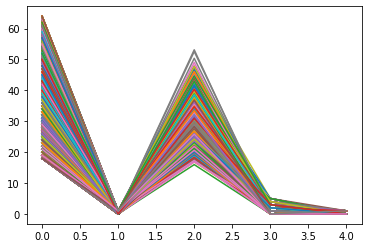

[[39.20702541  0.49476831 30.66339686  1.09491779  0.20478326]]
[[14.04470904  0.49997263  6.09590764  1.20504217  0.40354315]]


In [11]:
# Plot X to show that each column has different ranges
plt.plot(x.getT())
plt.show()

# First calculate the mean and standard deviation for each column
mean_x = x.mean(0)
std_x = x.std(0)

print(mean_x)
print(std_x)

[[-1.43876426  1.0105187  -0.45332    -0.90861367  1.97058663]
 [-1.50996545 -0.98959079  0.5096211  -0.07876719 -0.5074631 ]
 [-0.79795355 -0.98959079  0.38330685  1.58092576 -0.5074631 ]
 ...
 [-1.50996545  1.0105187   1.0148781  -0.90861367 -0.5074631 ]
 [-1.29636188  1.0105187  -0.79781341 -0.90861367 -0.5074631 ]
 [ 1.55168573  1.0105187  -0.26138796 -0.90861367  1.97058663]]

[[-1.85369076e-16  4.64667335e-17 -1.86904138e-16  2.72162296e-17
   2.14244832e-16]]

[[1. 1. 1. 1. 1.]]


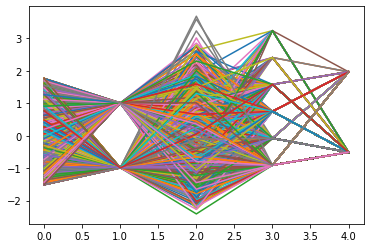

In [12]:
# Then define a function to standardize a row
def standardize_row(row):    
    return (row - mean_x) / std_x

# Standardize the entire matrix using the above function
standardized_x = np.apply_along_axis(standardize_row, 1, x)

print(standardized_x)

# To verify this new matrix, the mean of each column should be 0 and the standard deviation should be 1
# Values of small magnitude (<1e-15) are to be considered 0
print(f'\n{standardized_x.mean(0)}')
print(f'\n{standardized_x.std(0)}')

# Plot standardized X to show that each column has ranges around 0
plt.plot(standardized_x.getT())
plt.show()

# Selecting Training and Testing data

The data needs to be split about 50%/50% between training and testing data. So we need a convenient way to split up the data we now have into two sets.

In [13]:
def get_sets(data, split):
    """
    Convenience function that randomly selects a training and test set from the input data.
    
    :param data: (ndarray) the data you want to split
    :param split: (float) the percentage of the data you want to be TRAINING data
    
    :returns: (tuple) a tuple where the first element is the training set, and the second element is the test set
    """
    # Randomly shuffle the order from a copy of the data
    shuffled = data.copy()
    np.random.shuffle(shuffled)

    row_count = data.shape[0]

    # Stick in values of 1.0 at the beginning of the shuffled data, for the bias value
    bias = np.ones((row_count, 1))
    shuffled = np.hstack((bias, shuffled))

    # calc the number of samples, assumes the input samples are seperated by row
    training_count = round(row_count * split)
    
    training_set = shuffled[:training_count]
    test_set = shuffled[training_count:]
    
    return training_set, test_set

In [14]:
# Recombine the standardized input and output data before
standardized_data = np.hstack((standardized_x, y))

# Split our data into two sets, 50/50 split
training_set, test_set = get_sets(standardized_data, .50)

# Print the first 5 data points of each, for the fun of it
print(training_set[:5])
print('*' * 80)
print(test_set[:5])

# Also we can call `split_input_output` on these
training_x, training_y = split_input_output(training_set)
test_x, test_y = split_input_output(test_set)

[[ 1.00000000e+00 -1.36756307e+00 -9.89590795e-01  8.13923608e-01
   1.58092576e+00  1.97058663e+00  3.74653438e+04]
 [ 1.00000000e+00 -8.69154738e-01  1.01051870e+00 -1.74188939e+00
   1.58092576e+00  1.97058663e+00  1.64204945e+04]
 [ 1.00000000e+00 -1.57142836e-01 -9.89590795e-01 -1.36714155e-01
   7.51079284e-01 -5.07463099e-01  6.40641070e+03]
 [ 1.00000000e+00 -1.22516069e+00 -9.89590795e-01  2.37307260e-01
  -9.08613667e-01 -5.07463099e-01  2.05532490e+03]
 [ 1.00000000e+00  1.27661925e-01 -9.89590795e-01 -1.20403499e-02
   7.51079284e-01 -5.07463099e-01  7.25672310e+03]]
********************************************************************************
[[ 1.00000000e+00 -7.97953548e-01 -9.89590795e-01 -1.33669953e+00
   7.51079284e-01 -5.07463099e-01  4.42888785e+03]
 [ 1.00000000e+00  1.98863115e-01  1.01051870e+00  1.59231467e+00
   7.51079284e-01  1.97058663e+00  4.38963763e+04]
 [ 1.00000000e+00 -7.26752358e-01 -9.89590795e-01  6.12969119e-01
  -9.08613667e-01  1.97058663e+00

# Common functions used for each algorithm
Below are some functions defined for use in each algorithm

In [15]:
def gradient_mse(weight_vector, x_matrix, y_matrix):
    return 2 / x_matrix.shape[1] * x_matrix.getT() * (x_matrix * weight_vector - y_matrix)

def mean_square_error(weight_vector, x_matrix, y_matrix):
    h_y_matrix = x_matrix * weight_vector
    # h and y are expected to be the same size
    rows = y_matrix.shape[0]
    
    # Calculate the sum of the square differences between h(x) and y(x)
    sum_squares = sum((h_y_matrix[i,0] - y_matrix[i,0])**2 for i in range(0, rows))
    return sum_squares / rows

def generate_weights(size):
    # Initialize a weight vector with random values from -1000 to 1000 as the expected y values are large
    return np.random.rand(size, 1) * 1000

def select_random_samples(count, x_matrix, y_matrix):
    # Randomly select unique row indices
    indices = np.random.choice(x_matrix.shape[0], count, replace=False)
    # Select data points for the corresponding indices
    sample_x = x_matrix[indices, :]
    sample_y = y_matrix[indices, :]
    
    return sample_x, sample_y

In [16]:
# Just "productizing" a plot function
def plot(hypothesis, test_features, test_output, title, labels):
    b = float(hypothesis[0,0])
    plt.figure(figsize=(15,6))

    for i in range(1, len(hypothesis)):
        x = test_features[:, i].flatten()
        y = test_output.flatten()

        m = float(hypothesis[i, 0])

        xh = np.arange(x.min(), x.max() + 1)
        yh = xh * m + b

        plt.subplot(230 + i)
        plt.plot(x,y,'bo', markersize=3)
        plt.plot(xh, yh, 'r--', linewidth=3)
        plt.xlabel(labels[i - 1])

    plt.suptitle(title)
    plt.show()

# Batch Algorithm
One method of gradient descent is using the batch algorithm with no regularization.

In [17]:
def batch_algorithm(x_matrix, y_matrix, learning_rate, min_error, max_epochs, grad_fn=gradient_mse):
    weight_vector = generate_weights(x_matrix.shape[1])
    
    # Run the algorithm for up to as many epochs allowed
    for epoch in range(max_epochs):
        # Calculate the MSE and stop if the MSE of all points is below the threshold
        mse = mean_square_error(weight_vector, x_matrix, y_matrix)   
        if mse <= min_error:
            print(f'Stopped after {epoch} epochs where the MSE is below threshold: {mse}')
            return weight_vector
        
        # Update the weight vector using the gradient MSE and learning rate
        grad_mse = grad_fn(weight_vector, x_matrix, y_matrix)
        weight_vector = weight_vector - learning_rate * grad_mse
        
    print(f'Stopped after reaching {max_epochs} epochs with MSE of: {mse}')
    return weight_vector   


In [18]:
batch_trained_weights = batch_algorithm(training_x, training_y, 0.001, 1e6, 100)
print('Batch (No Regularization)')
print('Weights:\n', batch_trained_weights)
print('Test MSE:', mean_square_error(batch_trained_weights, test_x, test_y))

Stopped after reaching 100 epochs with MSE of: 38205862.20995507
Batch (No Regularization)
Weights:
 [[13141.84049873]
 [ 3632.48686498]
 [ -173.20494276]
 [ 1985.4565151 ]
 [  638.02769692]
 [ 9446.34828747]]
Test MSE: 35348513.239768095


# Stochastic Algorithm
The next method of gradient descent is using the stochastic algorithm with no regularization.

In [19]:
def stochastic_algorithm(x_matrix, y_matrix, initial_learning_rate, rate_exponent, min_error, max_epochs, grad_fn=gradient_mse):
    weight_vector = generate_weights(x_matrix.shape[1])
    
    # Run the algorithm for up to as many epochs allowed m times per epoch
    for epoch in range(max_epochs):        
        # Use exponential decay to determine the learning rate for each epoch
        learning_rate = np.exp(-rate_exponent * epoch) * initial_learning_rate
        for _ in range(training_x.shape[0]):
            # Calculate the MSE and stop if the MSE of all points is below the threshold
            mse = mean_square_error(weight_vector, x_matrix, y_matrix)   
            if mse <= min_error:
                print(f'Stopped after {epoch} epochs where the MSE is below threshold: {mse}')
                return weight_vector

            # Select a random data point and calculate the gradient MSE
            sample_x, sample_y = select_random_samples(1, x_matrix, y_matrix)
            grad_mse = grad_fn(weight_vector, sample_x, sample_y)  
            # Update the weight vector using the sample gradient MSE and learning rate 
            weight_vector = weight_vector - learning_rate * grad_mse
        
    print(f'Stopped after reaching {max_epochs} epochs with MSE of: {mse}')
    return weight_vector   

In [20]:
stochastic_trained_weights = stochastic_algorithm(training_x, training_y, 0.1, 0.1, 1e6, 25)
print('Stochastic (No Regularization)')
print('Weights:\n', stochastic_trained_weights)
print('Test MSE:', mean_square_error(stochastic_trained_weights, test_x, test_y))

Stopped after reaching 25 epochs with MSE of: 38514629.187675245
Stochastic (No Regularization)
Weights:
 [[12923.55386216]
 [ 3806.28917682]
 [ -112.65358818]
 [ 1662.87374132]
 [  651.34535461]
 [ 9088.28015002]]
Test MSE: 35897403.14630711


# Mini-Batch Algorithm
The next method of gradient descent is using the mini-batch algorithm with no regularization.

In [21]:
def mini_batch_algorithm(x_matrix, y_matrix, initial_learning_rate, rate_exponent, batch_size_percent, min_error, max_epochs, grad_fn=gradient_mse):
    weight_vector = generate_weights(x_matrix.shape[1])
    
    # Run the algorithm for up to as many epochs allowed m / batch_size times per epoch
    for epoch in range(max_epochs):        
        # Use exponential decay to determine the learning rate for each epoch
        learning_rate = np.exp(-rate_exponent * epoch) * initial_learning_rate
        for _ in range(int(100 / batch_size_percent)):
            # Calculate the MSE and stop if the MSE of all points is below the threshold
            mse = mean_square_error(weight_vector, x_matrix, y_matrix)   
            if mse <= min_error:
                print(f'Stopped after {epoch} epochs where the MSE is below threshold: {mse}')
                return weight_vector

            # Select a sample of data points and calculate the gradient MSE
            sample_x, sample_y = select_random_samples(int(training_x.shape[0] * batch_size_percent / 100), x_matrix, y_matrix)
            grad_mse = grad_fn(weight_vector, sample_x, sample_y)   
            # Update the weight vector using the sample gradient MSE and learning rate
            weight_vector = weight_vector - learning_rate * grad_mse
        
    print(f'Stopped after reaching {max_epochs} epochs with MSE of: {mse}')
    return weight_vector   

In [22]:
mini_trained_weights = mini_batch_algorithm(training_x, training_y, 0.1, 0.1, 10, 1e6, 50)
print('Mini-Batch (No Regularization)')
print('Weights:\n', mini_trained_weights)
print('Test MSE:', mean_square_error(mini_trained_weights, test_x, test_y))

Stopped after reaching 50 epochs with MSE of: 38230071.50914489
Mini-Batch (No Regularization)
Weights:
 [[13110.78508436]
 [ 3557.27278441]
 [ -186.73486137]
 [ 1979.45490965]
 [  549.10860835]
 [ 9397.54431426]]
Test MSE: 35392102.0972113


# L2 & L1 Regularization

In [23]:
# AKA Ridge
def l2_reg_grad(weight_vector, x_matrix, y_matrix, alpha):
    grad_mse = gradient_mse(weight_vector, x_matrix, y_matrix)
    
    # For n=1,...,n-1,n update the weights with 2 * alpha * w_n
    # The bias at n=0 is not affected
    reg_vector = 2 * alpha * weight_vector
    reg_vector[0, 0] = 0
    l2_grad = grad_mse + reg_vector
    
    return l2_grad

# AKA Lasso
def l1_reg_grad(weight_vector, x_matrix, y_matrix, alpha):
    grad_mse = gradient_mse(weight_vector, x_matrix, y_matrix)
    
    # For n=1,...,n-1,n update the weights with alpha * sign(w_n)
    # The bias at n=0 is not affected
    reg_vector = alpha * np.sign(weight_vector)
    reg_vector[0, 0] = 0
    l1_grad = grad_mse + reg_vector
    
    return l1_grad

def l2_trimmed_indices(weight_vector):
        # Get the index the attribute with the lowest magnitude in weight
        # Using numpy to calculate absolute value of each element, then get the index of max
        remove_at = abs(weight_vector).argmin(axis=0)[0,0]
        return [remove_at]
    
def l1_trimmed_indices(weight_vector, threshold=1):
        # Due to rounding errors, trim any values from [-threshold, threshold]
        indices = []
        for i in range(weight_vector.shape[0]):
            if abs(weight_vector[i, 0]) <= threshold:
                indices.append(i)
        return indices

# Alex - Testing with alpha=1. High alphas cause overflow so testing is needed
# Through trial and error, alpha=5 for L2 was found to minimize the error well
l2_with_alpha = lambda w, x, y: l2_reg_grad(w, x, y, 5)

# Through trial and error, alpha=1000 for L1 was found to minimize the error well
l1_with_alpha = lambda w, x, y: l1_reg_grad(w, x, y, 29000)

# Define lambdas for each algorithm to simplify running the regularization
batch_lambda = lambda x, y, r: batch_algorithm(x, y, 0.001, 1e6, 100, r)
stochastic_lambda = lambda x, y, r: stochastic_algorithm(x, y, 0.1, 0.1, 1e6, 25, r)
mini_batch_lambda = lambda x, y, r: mini_batch_algorithm(x, y, 0.1, 0.1, 10, 1e6, 50, r)

def regularization_run(alg_fn, reg_fn, trim_fn, algo_name, reg_name):
    run_trained_weights = alg_fn(training_x, training_y, reg_fn)
    print(algo_name, '(' + reg_name + ')')
    print('Before Removal Weights:\n', run_trained_weights)
    print('Before Removal Test MSE:', mean_square_error(run_trained_weights, test_x, test_y))

    # Remove the attribute with the lowest magnitude in weight
    run_removed = trim_fn(run_trained_weights)
    print('Removing attribute at indices:', run_removed)
    run_training_x = np.delete(training_x, run_removed, axis=1)
    run_test_x = np.delete(test_x, run_removed, axis=1)

    # Rerun algorithm with the trimmed attribute
    run_trained_weights = alg_fn(run_training_x, training_y, reg_fn)
    print('Final Weights:\n', run_trained_weights)
    print('Final Test MSE:', mean_square_error(run_trained_weights, run_test_x, test_y))
    
    return run_trained_weights, run_test_x, run_removed

In [24]:
# Batch with L2
# Save weights and trimmed test_x for plotting later
l2_batch_weights, l2_batch_test_x, l2_batch_indices = regularization_run(batch_lambda, l2_with_alpha, l2_trimmed_indices, 'Batch', 'L2 Regularization')

Stopped after reaching 100 epochs with MSE of: 38391973.85518007
Batch (L2 Regularization)
Before Removal Weights:
 [[13146.02307789]
 [ 3487.85551325]
 [ -194.239496  ]
 [ 1914.29190226]
 [  633.75264419]
 [ 9058.76994895]]
Before Removal Test MSE: 35740324.06947794
Removing attribute at indices: [2]
Stopped after reaching 100 epochs with MSE of: 38366406.4143775
Final Weights:
 [[13144.52469069]
 [ 3497.7982343 ]
 [ 1936.43064508]
 [  638.3315838 ]
 [ 9137.12748278]]
Final Test MSE: 35505676.8434764


In [25]:
# Stochastic with L2
_, _, _ = regularization_run(stochastic_lambda, l2_with_alpha, l2_trimmed_indices, 'Stochastic', 'L2 Regularization')

Stopped after reaching 25 epochs with MSE of: 144475111.4281708
Stochastic (L2 Regularization)
Before Removal Weights:
 [[13147.8023044 ]
 [  110.60997183]
 [  -49.57876705]
 [   96.05041898]
 [  -95.41781783]
 [  332.5198998 ]]
Before Removal Test MSE: 133512833.17367727
Removing attribute at indices: [2]
Stopped after reaching 25 epochs with MSE of: 143071024.54713276
Final Weights:
 [[13550.47427045]
 [   38.87405674]
 [  -31.62246516]
 [   27.86098136]
 [  437.31040823]]
Final Test MSE: 132713855.47065824


In [26]:
# Mini-Batch with L2
_, _, _ = regularization_run(mini_batch_lambda, l2_with_alpha, l2_trimmed_indices, 'Mini-Batch', 'L2 Regularization')

Stopped after reaching 50 epochs with MSE of: 48286435.67762789
Mini-Batch (L2 Regularization)
Before Removal Weights:
 [[13207.47841271]
 [ 2527.29563355]
 [ -140.17450303]
 [ 1464.43212276]
 [  485.91309546]
 [ 6607.33354077]]
Before Removal Test MSE: 45770873.46690462
Removing attribute at indices: [2]
Stopped after reaching 50 epochs with MSE of: 45932730.12944114
Final Weights:
 [[13133.62984201]
 [ 2633.12121023]
 [ 1592.93301207]
 [  610.64199446]
 [ 6968.83961423]]
Final Test MSE: 43444327.41480466


In [27]:
# Batch with L1
# Save weights and trimmed test_x for plotting later
l1_batch_weights, l1_batch_test_x, l1_batch_indices = regularization_run(batch_lambda, l1_with_alpha, l1_trimmed_indices, 'Batch', 'L1 Regularization')

Stopped after reaching 100 epochs with MSE of: 38280051.798108004
Batch (L1 Regularization)
Before Removal Weights:
 [[13136.8514346 ]
 [ 3510.29616894]
 [  -53.25329057]
 [ 1878.92878217]
 [  523.88407584]
 [ 9338.66964072]]
Before Removal Test MSE: 35322675.619081765
Removing attribute at indices: []
Stopped after reaching 100 epochs with MSE of: 38280051.79808887
Final Weights:
 [[13136.85143462]
 [ 3510.29616905]
 [  -53.25329066]
 [ 1878.92878207]
 [  523.88407584]
 [ 9338.66964067]]
Final Test MSE: 35322675.619157106


In [28]:
# Stochastic with L1
_, _, _ = regularization_run(stochastic_lambda, l1_with_alpha, l1_trimmed_indices, 'Stochastic', 'L1 Regularization')

Stopped after reaching 25 epochs with MSE of: 157574597.04596713
Stochastic (L1 Regularization)
Before Removal Weights:
 [[ 1.36009667e+04]
 [ 2.12798243e+01]
 [-2.69234623e+01]
 [-8.26673031e+01]
 [-9.46031524e+01]
 [-1.76245520e+00]]
Before Removal Test MSE: 140982014.96349317
Removing attribute at indices: []
Stopped after reaching 25 epochs with MSE of: 151328409.19153988
Final Weights:
 [[13038.77484305]
 [  -36.41043911]
 [ -132.38638912]
 [ -164.47015854]
 [   94.58730804]
 [  269.79017394]]
Final Test MSE: 136686100.522619


In [29]:
# Mini-Batch with L1
_, _, _ = regularization_run(mini_batch_lambda, l1_with_alpha, l1_trimmed_indices, 'Mini-Batch', 'L1 Regularization')

Stopped after reaching 50 epochs with MSE of: 44140347.27994999
Mini-Batch (L1 Regularization)
Before Removal Weights:
 [[1.29582625e+04]
 [2.32645064e+03]
 [1.94261519e+00]
 [8.09294161e+02]
 [3.91165965e+00]
 [8.18357924e+03]]
Before Removal Test MSE: 40959970.01221814
Removing attribute at indices: []
Stopped after reaching 50 epochs with MSE of: 43057869.28667642
Final Weights:
 [[13083.54015422]
 [ 2544.94504557]
 [  -25.10241681]
 [  944.52219822]
 [   23.98327455]
 [ 8221.78009715]]
Final Test MSE: 39862161.36584262


# Batch Gradient Descent Plots

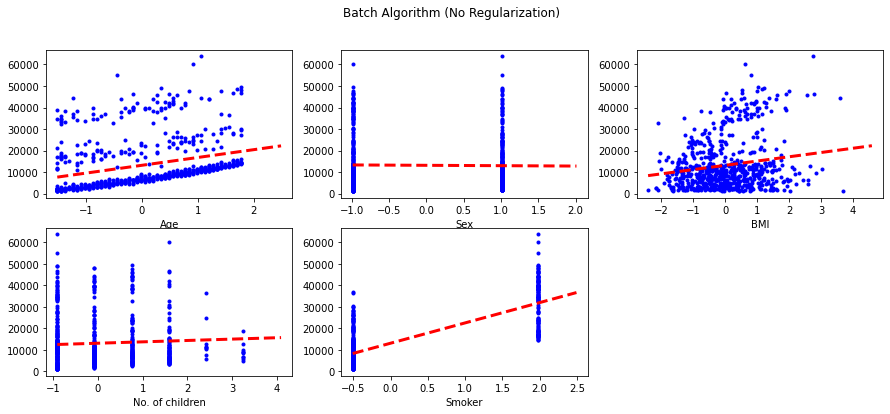

In [30]:
labels = ["Age", "Sex", "BMI", "No. of children", "Smoker"]

# Plot Batch with no regularization
plot(batch_trained_weights, test_x, test_y, "Batch Algorithm (No Regularization)", labels)

# L2 & L1 Regularization

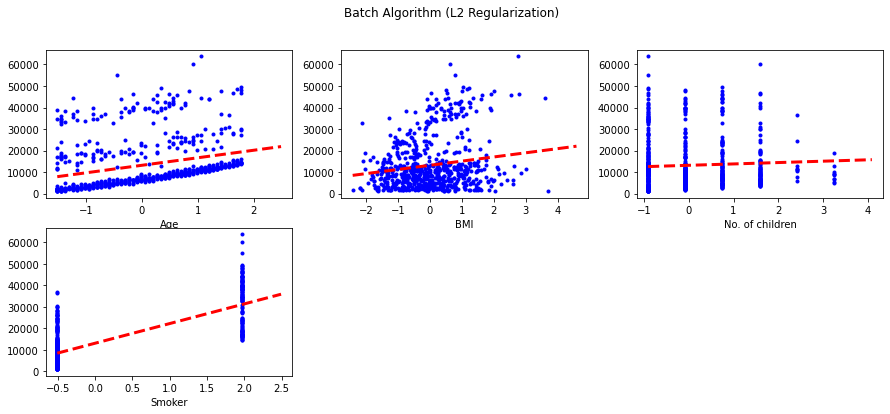

In [31]:
# Plot Batch with L2 regularization
l2_labels = np.delete(labels, [x - 1 for x in l2_batch_indices])
plot(l2_batch_weights, l2_batch_test_x, test_y, "Batch Algorithm (L2 Regularization)", l2_labels)

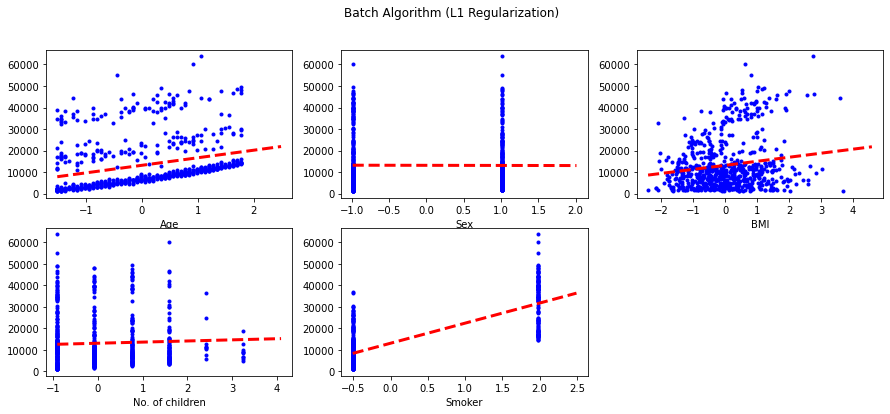

In [32]:
# Plot Batch with L1 regularization
l1_labels = np.delete(labels, [x - 1 for x in l1_batch_indices])
plot(l1_batch_weights, l1_batch_test_x, test_y, "Batch Algorithm (L1 Regularization)", l1_labels)